In [145]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')


### Load the Data

In [109]:
df = pd.read_csv('assets/car_data.csv')

In [110]:
#df[(df['Make'] == 'Porsche') & (df['Model'] == '911') & (df['Year'] == 2017)].sort_values('Year', ascending= False).drop_duplicates()

In [111]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [112]:
# use built in str lib to do so
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [113]:
df.columns 

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [138]:
df.dtypes

make                   object
model                  object
year                    int64
engine_fuel_type       object
engine_hp             float64
engine_cylinders      float64
transmission_type      object
driven_wheels          object
number_of_doors       float64
market_category        object
vehicle_size           object
vehicle_style          object
highway_mpg             int64
city_mpg                int64
popularity              int64
msrp                    int64
price_segment        category
dtype: object

In [114]:
df.shape

(11914, 16)

In [115]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [116]:
df = df.dropna()

In [117]:
# how many columns have NA values
df.isna().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [118]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [119]:
#df.groupby('Market Category')['MSRP'].mean()

In [120]:
# feature engineering using pd.cut
# Economy < 20k
# Budget 20k - 30k
# Mid-range 30k - 45k
# premium 45k - 70k
# lux 70k - 100k
# ultra-luxury >100k 
bins = [0, 20000, 30000, 45000, 70000, 100000, float('inf')]
labels = ['Economy', 'Budget', 'Mid-range', 'Premium', 'Luxury', 'Ultra-Luxury']
df['price_segment'] = pd.cut(df['msrp'], bins = bins, labels = labels)

In [121]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,price_segment
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Premium
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Mid-range
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Mid-range
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Budget
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,Mid-range


Text(0, 0.5, 'Count')

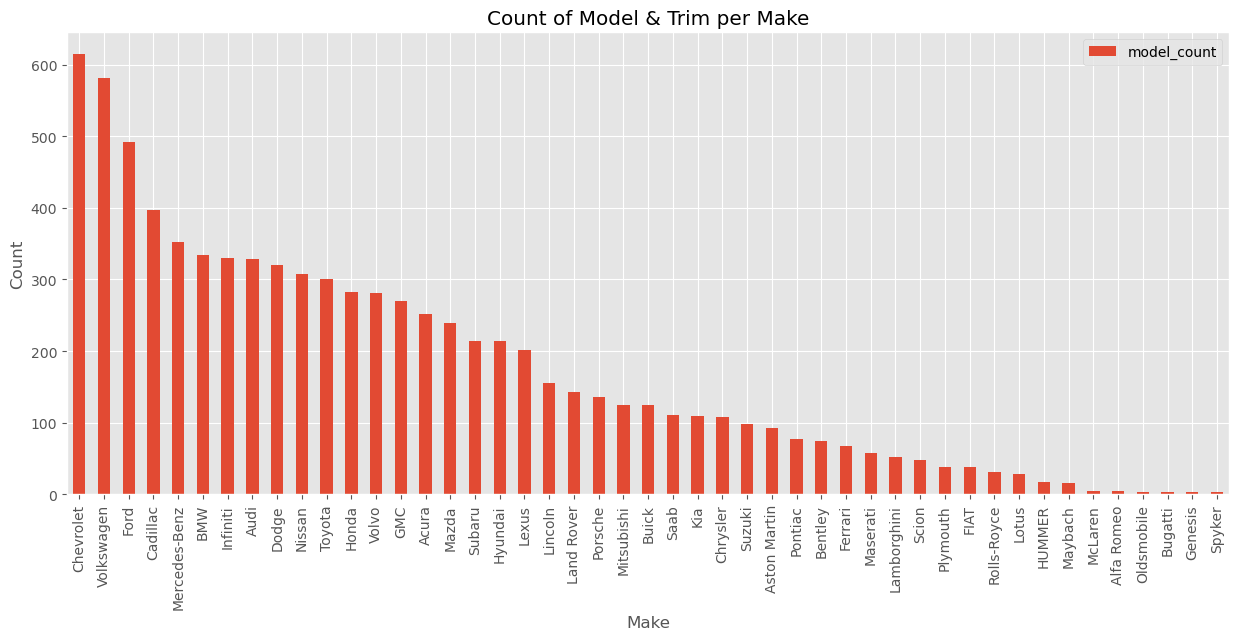

In [132]:
# it appears that there are many different trim under each model and each are unique at a different price point.
model_count_per_make = df.groupby('make')['model'].count().reset_index(name = 'model_count')
model_count_per_make = model_count_per_make.sort_values(by = 'model_count', ascending = False)
model_count_per_make

# plot 

model_count_per_make.plot(kind = 'bar', x = 'make', y = 'model_count', figsize = (15, 6))
plt.title("Count of Model & Trim per Make")
plt.xlabel("Make")
plt.ylabel("Count")

In [176]:
top_20_most_expensive = []

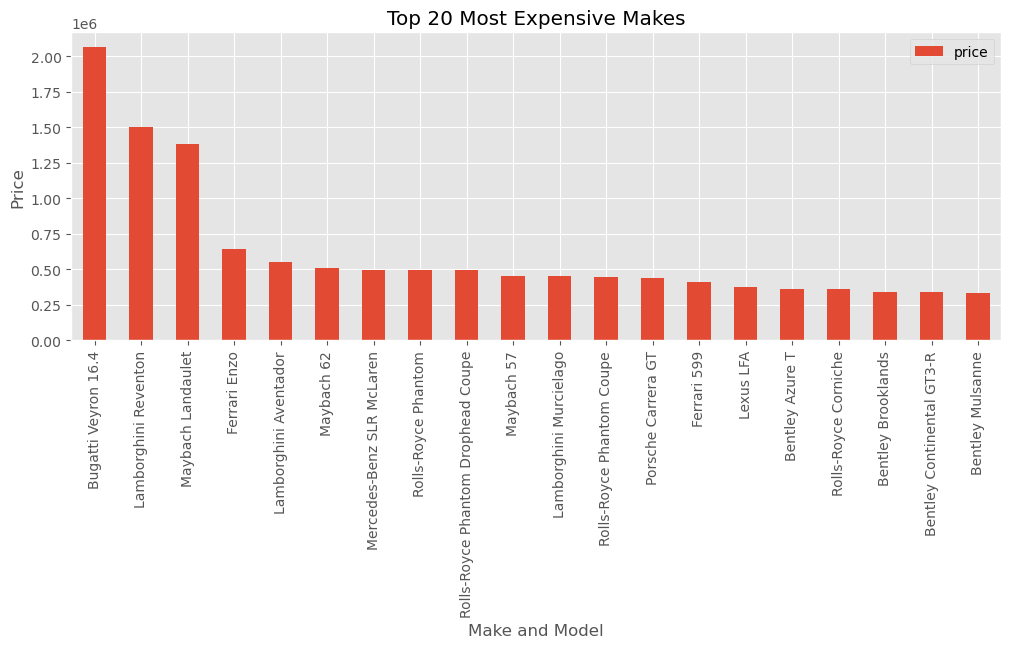

In [193]:
top_20_most_expensive = df.groupby(['make', 'model'])['msrp'].max().sort_values(ascending=False).reset_index(name = 'price').head(20)
top_20_most_expensive['make_model'] = top_20_most_expensive['make'] + ' ' + top_20_most_expensive['model']



top_20_most_expensive.plot(kind = 'bar', x = 'make_model', y = 'price', title= 'Top 20 Most Expensive Makes', figsize=(12, 4))
plt.xlabel('Make and Model')
plt.ylabel('Price')
plt.show()

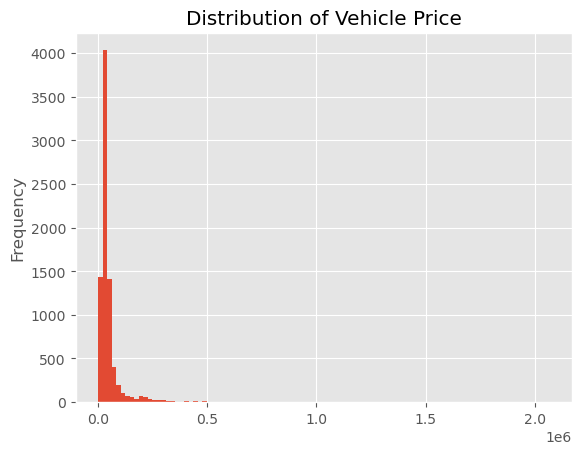

In [148]:
price_hist = df['msrp'].plot(kind = 'hist', bins = 100, title = 'Distribution of Vehicle Price')
# We can see that our data is heavily right skewed meaning most of the data are Budget to Midrange vehicles

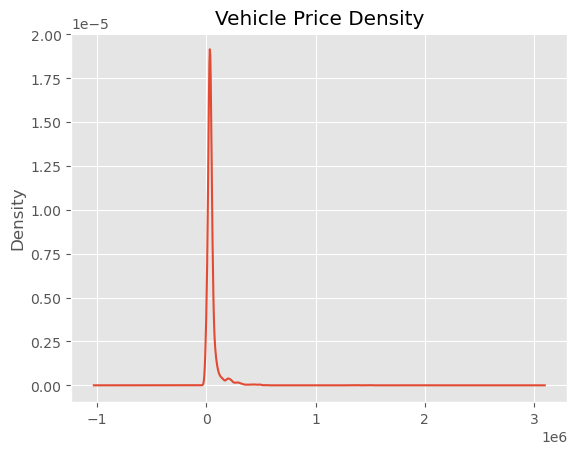

In [195]:
price_kde = df['msrp'].plot(kind = 'kde', title = 'Vehicle Price Density')

In [199]:
df.to_csv('assets/cleaned_car_data.csv', index = False)